# 3b - Create Figure 4 and supplementary figures on different response timescale metrics


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import pearsonr, spearmanr

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from help_functions import d_reg_num_name


In [2]:
p_shift='_shift_years_rel_2020'

avg_over = '101yr'
approach = '_via_5yravg'
DATE = 'Feb12_2024'
add = '_lowess_added_quantiles_added'
rel_add = '_rel_2020'
norm_add = '_clusters_normalised'

In [3]:
pd_reg_stats = pd.read_csv('../data/3_shift_summary_region_characteristicsFeb12_2024.csv', index_col=[0])
pd_reg_stats['gt_2020_via_5yravg'] = pd_reg_stats['regional_volume_m3_2020_via_5yravg']*900/ (1e9*1e3)

In [5]:
# this is the data that will be presented in Fig. 4 
pd_reg_stats[['ice_loss_1.2°C_%_rel_2020',
              'ice_loss_slope_1.5_to_3.0_per_tenth_degC_rel_2020',
              'resp_time_-80%_1_5_deg',
              'elev_diff_area_weighted',
              'gt_2020_via_5yravg', 
              '20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%',
              'median_reg_vs_glob_ch_ref_1986-2005']]

,ice_loss_1.2°C_%_rel_2020,ice_loss_slope_1.5_to_3.0_per_tenth_degC_rel_2020,resp_time_-80%_1_5_deg,elev_diff_area_weighted,gt_2020_via_5yravg,20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%,median_reg_vs_glob_ch_ref_1986-2005
All,39.147191,2.022027,463.0,1367.898237,137490.717087,3.944014,1.81
01,37.398154,1.961208,104.0,2641.094038,16245.546456,7.993690,1.48
02,74.130578,1.213469,57.5,992.404598,795.142894,16.760171,1.34
03,32.544533,2.411266,644.5,1451.742773,24850.960070,2.538070,2.42
04,85.185729,0.805021,241.5,1021.911644,7212.270589,7.219599,2.22
05,58.203904,1.733574,373.0,1109.890128,13409.544919,5.310741,1.88
06,60.649639,2.159817,316.0,1232.269069,3194.385071,5.843017,0.94
07,46.249093,2.393393,318.5,773.418302,6565.617087,3.287504,2.97
08,65.520179,1.213396,166.5,598.513198,237.404899,12.948569,1.28
09,64.633761,1.656493,445.0,657.137682,12964.626779,1.671934,3.12


In [13]:

num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)'}

plt.rc('font', size=22) 

In [14]:

fs = 27

def plotlabel_0(xvar, yvar, label, ax=None):
    ax.text(xvar-10, yvar+0.8, label, alpha=0.7, fontsize=fs)
    
def plotlabel_1(xvar, yvar, label, ax=None):
    ax.text(xvar+0-1, yvar+0.8, label, alpha=0.7, fontsize=fs)    
    
def plotlabel_1tenth(xvar, yvar, label, ax=None):
    ax.text(xvar+0-1/10, yvar+0.8/10, label, alpha=0.7, fontsize=fs)    
    
def plotlabel_b0(xvar, yvar, label, ax=None):
    ax.text(xvar+5, yvar-3.1, label, alpha=0.7, fontsize=fs)

def plotlabel_b(xvar, yvar, label, ax=None):
    ax.text(xvar, yvar-3.1, label, alpha=0.7, fontsize=fs)

def plotlabel_btenth(xvar, yvar, label, ax=None):
    ax.text(xvar, yvar-3.1/10, label, alpha=0.7, fontsize=fs)
def plotlabel_ltenth(xvar, yvar, label, ax=None):
    ax.text(xvar-0.9/10, yvar-4, label, alpha=0.7, fontsize=fs)
def plotlabel_bbr(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar-32, label, alpha=0.7, fontsize=fs)
    
def plotlabel_bbl(xvar, yvar, label, ax=None):
    ax.text(xvar-1, yvar-32, label, alpha=0.7, fontsize=fs)
    
def plotlabelr_l(xvar, yvar, label, ax=None):
    ax.text(xvar-1, yvar+5, label, alpha=0.7, fontsize=fs)

def plotlabelr(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar+2, label, alpha=0.7, fontsize=fs)
    
    
def plotlabel_c(xvar, yvar, label, ax=None):
    ax.text(xvar-0.08, yvar+0.02, label, alpha=0.7, fontsize=fs)

def plotlabel_cc(xvar, yvar, label, ax=None):
    ax.text(xvar-0.03, yvar-0.06, label, alpha=0.7, fontsize=fs)


In [15]:

_pd_lowess_ch = pd_reg_stats.copy() # loc[pd_lowess_ch.index!='Globally']
_pd_lowess_ch['region'] = _pd_lowess_ch.index

In [16]:
d_reg_num_name['19'] = 'Subantarctic &\n      Antarctic Islands'
d_reg_num_name['12'] =  'Caucasus &\n      Middle East'
d_reg_num_name['05'] =  'Greenland\n      Periphery'
d_reg_num_name['07'] = 'Svalbard &\n      Jan Mayen'

In [17]:

pd_hugo_far_reg = _pd_lowess_ch.drop('All')
pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['gt_2020_via_5yravg']/_pd_lowess_ch.loc['All']['gt_2020_via_5yravg']).values
rgi_regs_sel_sorted_vol = pd_hugo_far_reg.sort_values(by='%_2020_rel_global', ascending=False).index.values

legend_text = ''
for r in pd_hugo_far_reg.index: #rgi_regs_sel_sorted_vol:
    legend_text = legend_text + f'{r}: {d_reg_num_name[r]}\n'
legend_text

'01: Alaska\n02: W Canada & US\n03: Arctic Canada N\n04: Arctic Canada S\n05: Greenland\n      Periphery\n06: Iceland\n07: Svalbard &\n      Jan Mayen\n08: Scandinavia\n09: Russian Arctic\n10: North Asia\n11: Central Europe\n12: Caucasus &\n      Middle East\n13: Central Asia\n14: South Asia W\n15: South Asia E\n16: Low Latitudes\n17: Southern Andes\n18: New Zealand\n19: Subantarctic &\n      Antarctic Islands\n'

In [18]:
min_s, max_s = _pd_lowess_ch.gt_2020_via_5yravg.min(),  _pd_lowess_ch.gt_2020_via_5yravg.max() 

### Fig. 3

In [19]:
# show the sensitivity instead in per 0.1°C
_pd_lowess_ch = _pd_lowess_ch.rename(index={'All':'Global'})
_pd_lowess_ch['region'] = _pd_lowess_ch.index

In [20]:
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_diverging',
    [
        (0, 'blue'),       # Blue for values far below 1
        #(0.25, 'dodgerblue'), # Brighter blue closer to 1
        #(0.4,'dodgerblue'),
        (0.5, 'orange'),       # Neutral gray at exactly 1
        #(0.6,'orange'),
        #(0.75, 'indianred'), # Brighter red closer to 1
        (1, 'red')          # Red for values far above 1
    ]
)
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_diverging',
    [
        (0, 'blue'),       # Blue for values far below 1
        #(0.25, 'dodgerblue'), # Brighter blue closer to 1
        (0.45,'dodgerblue'),
        (0.5, 'grey'),       # Neutral gray at exactly 1
        (0.55,'orange'),
        #(0.75, 'indianred'), # Brighter red closer to 1
        (1, 'red')          # Red for values far above 1
    ]
)

cmap = sns.color_palette("coolwarm", as_cmap=True)
####cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True) ### does not work so well
# Normalize the hue values around 1
norm = mcolors.TwoSlopeNorm(vmin=1/_pd_lowess_ch['median_reg_vs_glob_ch_ref_1986-2005'].max(),
                            vcenter=_pd_lowess_ch.loc['Global']['median_reg_vs_glob_ch_ref_1986-2005'],
                            vmax=_pd_lowess_ch['median_reg_vs_glob_ch_ref_1986-2005'].values.max())

pval 0.01450849826103622
pval 7.945754181709547e-06
pval 2.4425413626605395e-07
pval 2.353290129320101e-09


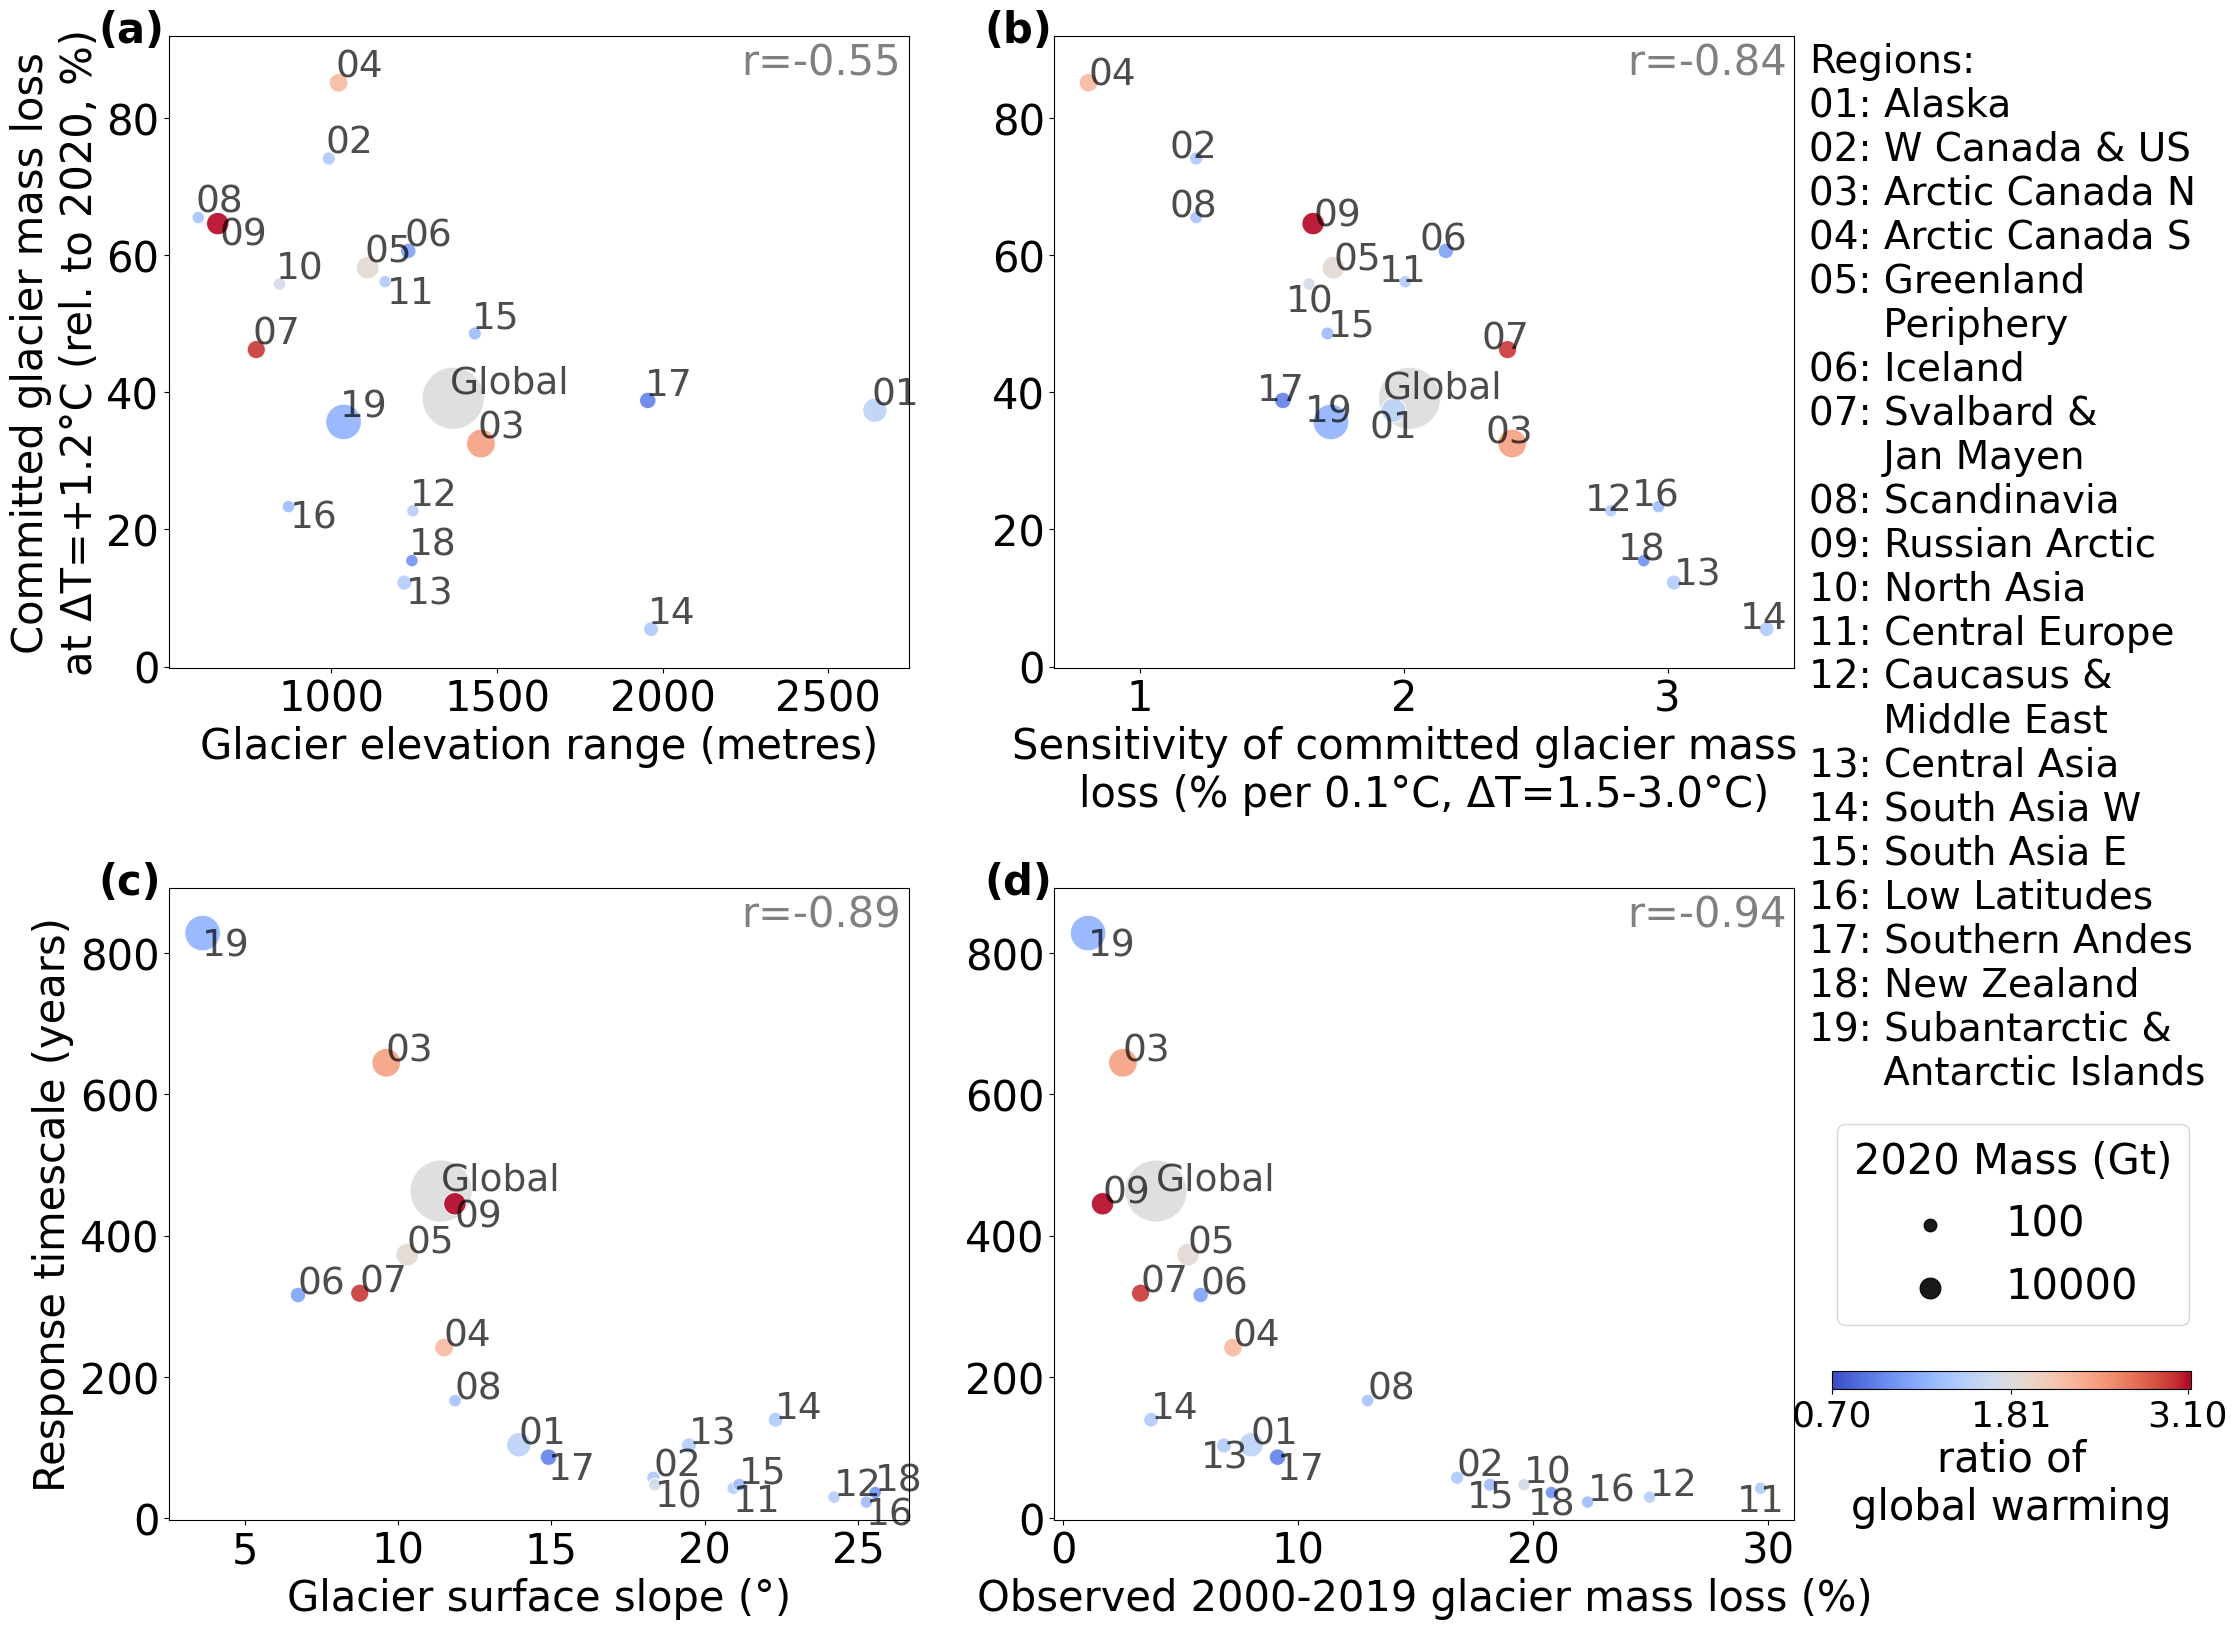

In [21]:
subpanels = False
for changing_size in [True]: 
    if changing_size:
        sizes = (80,2000)
        alpha = 0.9
        add ='_changing_size'
    else:
        sizes = (200,200)
        alpha = 0.9#7
        add = ''

    assert (rel_add == '_rel_2020')

    plt.rc('font', size=30)  
    fs_t = 30
    fig,axs = plt.subplots(2,2,figsize=(22.5,17)) #24
    num_text_x = 0.01
    num_text_y = 0.95
    axs = axs.flatten()
    ###    a)
    ax=axs[0]

    drop_l = ['11','16', '13', '09']
    xx = 'elev_diff_area_weighted'
    #ax.set_xlabel(f'Glacier elevation range\n(glacier-area weighted, metres)') 
    ax.set_xlabel(f'Glacier elevation range (metres)') 

    # \n(in metres, glacier-area weighted)

    yy = f'ice_loss_1.2°C_%{rel_add}'

    scatti = sns.scatterplot(data=_pd_lowess_ch,
                             hue='median_reg_vs_glob_ch_ref_1986-2005',
                             palette=cmap, 
                            hue_norm=norm,
                            y=yy, 
                            x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                            color='black',alpha =alpha,
                             legend = False, ax = ax) #'full   
        

    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values, 
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.99,0.99, f'r={corrcoef}', ha='right', va='top',
                transform=ax.transAxes, color='grey', fontsize=fs_t)

    _pd_lowess_ch.drop(drop_l).apply(lambda x: plotlabel_0(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l].apply(lambda x: plotlabel_b0(x[xx],x[yy], x.region, ax=ax), axis=1)
    if rel_add == '_rel_farinotti':
        ax.set_ylabel('Glacier mass loss until steady-state\n(% rel. to Farinotti, ΔT=+1.2°C)') 
    else:
        #ax.set_ylabel('Glacier mass loss until steady-state\n(% rel. to 2020, ΔT=+1.2°C)')  # Steady-state glacier mass loss
        ax.set_ylabel('Committed glacier mass loss\nat ΔT=+1.2°C (rel. to 2020, %)')  # Steady-state glacier mass loss
    
    ##### b)
    ax1 = ax
    ax.set_xlim([510, ax.get_xlim()[-1]])
    ### 
    ax = axs[1]

    temp0 = 1.5
    temp1 = 3.0
    xx=f'ice_loss_slope_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_tenth_degC{rel_add}'
    yy=f'ice_loss_1.2°C_%{rel_add}'
    sns.scatterplot(data=_pd_lowess_ch, x= xx,
                    color='black', alpha =alpha,  
                    hue='median_reg_vs_glob_ch_ref_1986-2005',
                                 palette=cmap, 
                                hue_norm=norm,
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                        y=yy, ax = ax,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    legend = False) #False)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.99,0.99, f'r={corrcoef}', ha='right', va='top',
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #drop_l_2 = ['01','04','02','07','16','08']
    drop_l_2 = ['01','13','04','15','09','05','10'] #10

    _pd_lowess_ch.drop(drop_l_2).apply(lambda x: plotlabel_1tenth(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['13','04','15','09','05']].apply(lambda x: plotlabel_btenth(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['01','10']].apply(lambda x: plotlabel_ltenth(x[xx],x[yy], x.region, ax=ax), axis=1)

    # ax.set_xlabel('Sensitivity of glacier mass loss until steady-state\n'+r'(ΔT=1.5-3.0°C, % °C$^{-1}$)')
    ax.set_xlabel('Sensitivity of committed glacier mass   \nloss '+r'(% per 0.1°C, ΔT=1.5-3.0°C)')
    ax.set_xlim([ax.get_xlim()[0],34.8/10])
    #(difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')
    ax.set_ylabel('')

    ################## c)
    ax2=ax
    num_text_x = 0.01
    num_text_y = 0.93
    r=1
    c=2
    ax=axs[2]
    yy2='resp_time_-80%_1_5_deg'

    ylabel = f'Response timescale (years)'
    xx2 = f'resp_time_-50%_1_5_deg'
    xlabel2 = f'Year (50%, $\Delta$T=1.5$\pm$0.2°C)'

    xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=_pd_lowess_ch,
                    hue='median_reg_vs_glob_ch_ref_1986-2005',
                     palette=cmap, 
                    hue_norm=norm,
                    y= yy, 
                    x=xx,
                    color='black',alpha =alpha,
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                    legend = False, ax = ax)
    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.99,0.99, f'r={corrcoef}', ha='right', va='top',
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    drop_l_3 = ['11','10','19','16','17', '09']

    _pd_lowess_ch.drop(drop_l_3).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)

    _pd_lowess_ch.loc[['11','10','19','16','17','09']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    ax.set_ylabel(ylabel)

    ax.set_xlabel(f'Glacier surface slope (°)') #\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')

    if subpanels:
        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                                      sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )
        inset_ax.set_xlabel(xlabel2+ '     ', fontsize=22) #'Year (50%)')
        inset_ax.set_ylabel(ylabel + '     ', fontsize=22) #'Year (80%)') 
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[3], weight='bold', fontsize=32, transform=inset_ax.transAxes)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))
        
        #############
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        #print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(450,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)
    ax3=ax

    ##############################################
    ax = axs[3]
    
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response timescale (years)'

    #s when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    xx2 = f'resp_time_-80%_3_0_deg'

    xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    scatti = sns.scatterplot(data=  _pd_lowess_ch,
                    hue='median_reg_vs_glob_ch_ref_1986-2005',
                                 palette=cmap, 
                                hue_norm=norm,
                    y= yy, 
                    x=xx,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    color='black',alpha =alpha,
                    s=200,
                    size = 'gt_2020_via_5yravg',
                    sizes=sizes,
                    legend = True, ax=ax)

    han,lab = ax.get_legend_handles_labels()

    size_r = sizes[1] - sizes[0]
    custom_labels = [100, 10000]
    custom_sizes = []
    for c in custom_labels:
        custom_sizes.append(sizes[0] + size_r*(c-min_s)/(max_s-min_s))

    # Create a new set of handles for the custom sizes
    custom_handles = [ax.scatter([], [], s=size, color='black', alpha = alpha) for size in custom_sizes]

      
    ax.legend().remove()
    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.99,0.99, f'r={corrcoef}', ha='right', va='top',
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    _pd_lowess_ch.drop(['19','17','18','15','13','11']).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['19','17']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['18','15','13','11']].apply(lambda x: plotlabel_bbl(x[xx],x[yy], x.region, ax=ax), axis=1)

    ax.set_ylabel(ylabel)

    ax.set_xlabel('Observed 2000-2019 glacier mass loss (%)')
   


    ax4=ax

    ############
    num_text_x = -0.095 #0.01
    for j,axi in enumerate([ax1, ax2,ax3,ax4]):
        num_text_y = 0.99 #0.945
        if j==3 and subpanels:
            jj = j+1
        else:
            jj = j
        axi.text(num_text_x, num_text_y,
                 num_dict[jj], fontsize=30, weight='bold',transform=axi.transAxes)
        if j>=2:
            axi.set_ylim([-2,892])
        else:
            axi.set_ylim([-0.2,92])
        if j in [1,3]:
            axi.set_ylabel('')

    plt.tight_layout(rect=(0,0,0.833,1))

    #ax.legend(han[1:7], lab[1:7], loc='lower left',ncols=2,
    #          bbox_to_anchor=(1.01,0.02), title='Factor of\nglobal warming')
    ax.text(1.02, 0.62, 'Regions:\n'+ legend_text, transform=ax.transAxes, #weight='bold',
            fontsize=28)

    # Adding a color bar to represent the colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Update the legend with the custom sizes
    scatti.legend(custom_handles, custom_labels,
                   title='2020 Mass (Gt)', loc='upper left', bbox_to_anchor=(1.03,0.66))

    
    cbar_ax = fig.add_axes([0.842, 0.15, 0.135, 0.15])  # [left, bottom, width, height]
    cbar = plt.colorbar(sm, ax=cbar_ax, orientation='horizontal', shrink=1.18, label='ratio of\nglobal warming')
    hue_values = _pd_lowess_ch['median_reg_vs_glob_ch_ref_1986-2005'].values
    cbar.set_ticks([hue_values.min().round(1), _pd_lowess_ch.loc['Global']['median_reg_vs_glob_ch_ref_1986-2005'],
                    hue_values.max().round(1)])
    cbar.set_ticklabels([f"{hue_values.min().round(1):.1f}",
                         _pd_lowess_ch.loc['Global']['median_reg_vs_glob_ch_ref_1986-2005'].round(1), f"{hue_values.max().round(1):.1f}"], fontsize=26)
    cbar_ax.axis('off')
    sm.set_clim(hue_values.min(), hue_values.max())

    plt.savefig(f'figures/fig4{add}_subpanel{subpanels}_wglobal_w_warming_ratio.png')
    plt.savefig(f'figures/fig4{add}_subpanel{subpanels}_wglobal_w_warming_ratio.pdf')

## Create supplementary figure anaysing the correlations of other ...

In [25]:
df =  pd_reg_stats.copy()


In [31]:
columns_sel3_d = {

    ####### climate indices 
    'temp_ch_avg_2000-2019_vs_1901-1920': 'ΔTemp 2000-2019 - 1901-1920 (reg-aw)',
    'temp_avg_2000-2019': 'Temp 2000-2019 (reg-aw)',
    'prcp_avg_2000-2019': 'Prcp 2000-2019 (reg-aw)',
    'continentality_index_avg_2000-2019': 'Continentality index 2000-2019 (reg-aw)',
    'median_reg_vs_glob_ch_ref_1986-2005': 'Ratio reg vs global ΔTemp to 1986-2005 (median, reg-aw)', 

    ##### glacier topography ... 
    'slope_weighted_area_avg': 'Glacier surface slope (reg-aw)',
    'lat_absolute_weighted_area_avg': 'Latitude (absolute, reg-aw)',
    'mean_vol_ten_largest_glac': 'Mean mass (10 largest)',
    #'mean_area_ten_largest_glac': 'Mean area (10 largest)',
    'elev_diff_area_weighted': 'Elevation range (reg-aw)',
    'max_elev_area_weighted': 'Maximum elevation (reg-aw)',
    'min_elev_area_weighted': 'Minimum elevation (reg-aw)',
    'ice_cap_ratio_hundredlargest_glac': 'Ratio ice caps (100 largest)',
    'marine_term_ratio_hundredlargest_glac': 'Ratio marine-terminating (100 largest)',
    f'regional_volume_m3_2020{approach}': 'Mass (2020, reg)', # mass and volume are directly linked.. 

    # glacier changes in the past
    'geodetic_obs_area_weighted':'Observed geodetic MB (2000-2019, reg)',# (Hugonnet, 2021)',
    'dvoldt_m3_hugonnet': 'Observed ΔMassΔt (2000-2019, reg)', # (Hugonnet, 2021)',
    '20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%': 'Observed ΔMassΔt (2000-2019 rel. 2000 Mass, reg)',
    
    # glacier simulation changes from GMIP3 
    'resp_time_-50%_1_5_deg': 'Response timescale (~1.5°C, 50%, reg)', # #'Time to reach 50% of changes (~1.5°C, reg)',
    # let's reduce amount of variables as much as possible ... 
    #'resp_time_-50%_3_0_deg': 'Response time scale (~3.0°C, 50%, reg)', #'Time to reach 50% of changes (~3.0°C, reg)',
    'resp_time_-80%_1_5_deg': 'Response timescale (~1.5°C, 80%, reg)', #'Time to reach 80% of changes (~1.5°C, reg)',
    'resp_time_-80%_3_0_deg': 'Response timescale (~3.0°C, 80%, reg)', #'Time to reach 80% of changes (~3.0°C, reg)',
    'ice_loss_1.2°C_%_rel_2020': 'Committed ice loss at 1.2°C (rel. 2020, reg)',
    'ice_loss_slope_1.5_and_3.0_per_tenth_degC_rel_2020': 'Committed ice loss sensitivity (1.5-3.0°C, rel. 2020, reg)'
}
columns_sel3 = columns_sel3_d.keys()

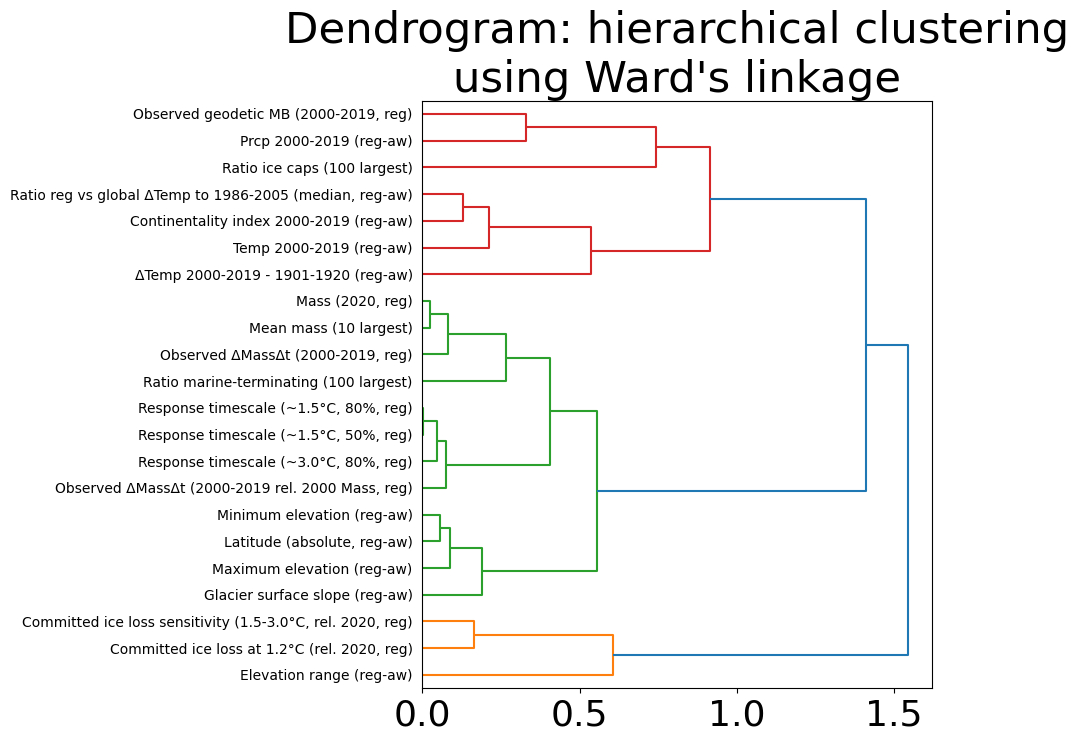

In [32]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
X = df.iloc[1:].reset_index(drop=True)[columns_sel3]
assert list(X.columns) == list(columns_sel3)
X.columns = columns_sel3_d.values()

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
corr = spearmanr(X).correlation
# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=0,
    orientation='right'
)
dendro_idx = np.arange(0, len(dendro["ivl"]))
plt.title("Dendrogram: hierarchical clustering\nusing Ward's linkage")
#ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
#ax2.set_xticks(dendro_idx)
#ax2.set_yticks(dendro_idx)
#ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
#ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()
#labels_y = plt.gca().get_yticklabels()
#plt.gca().set_yticklabels(list(columns_sel3_d.values()));

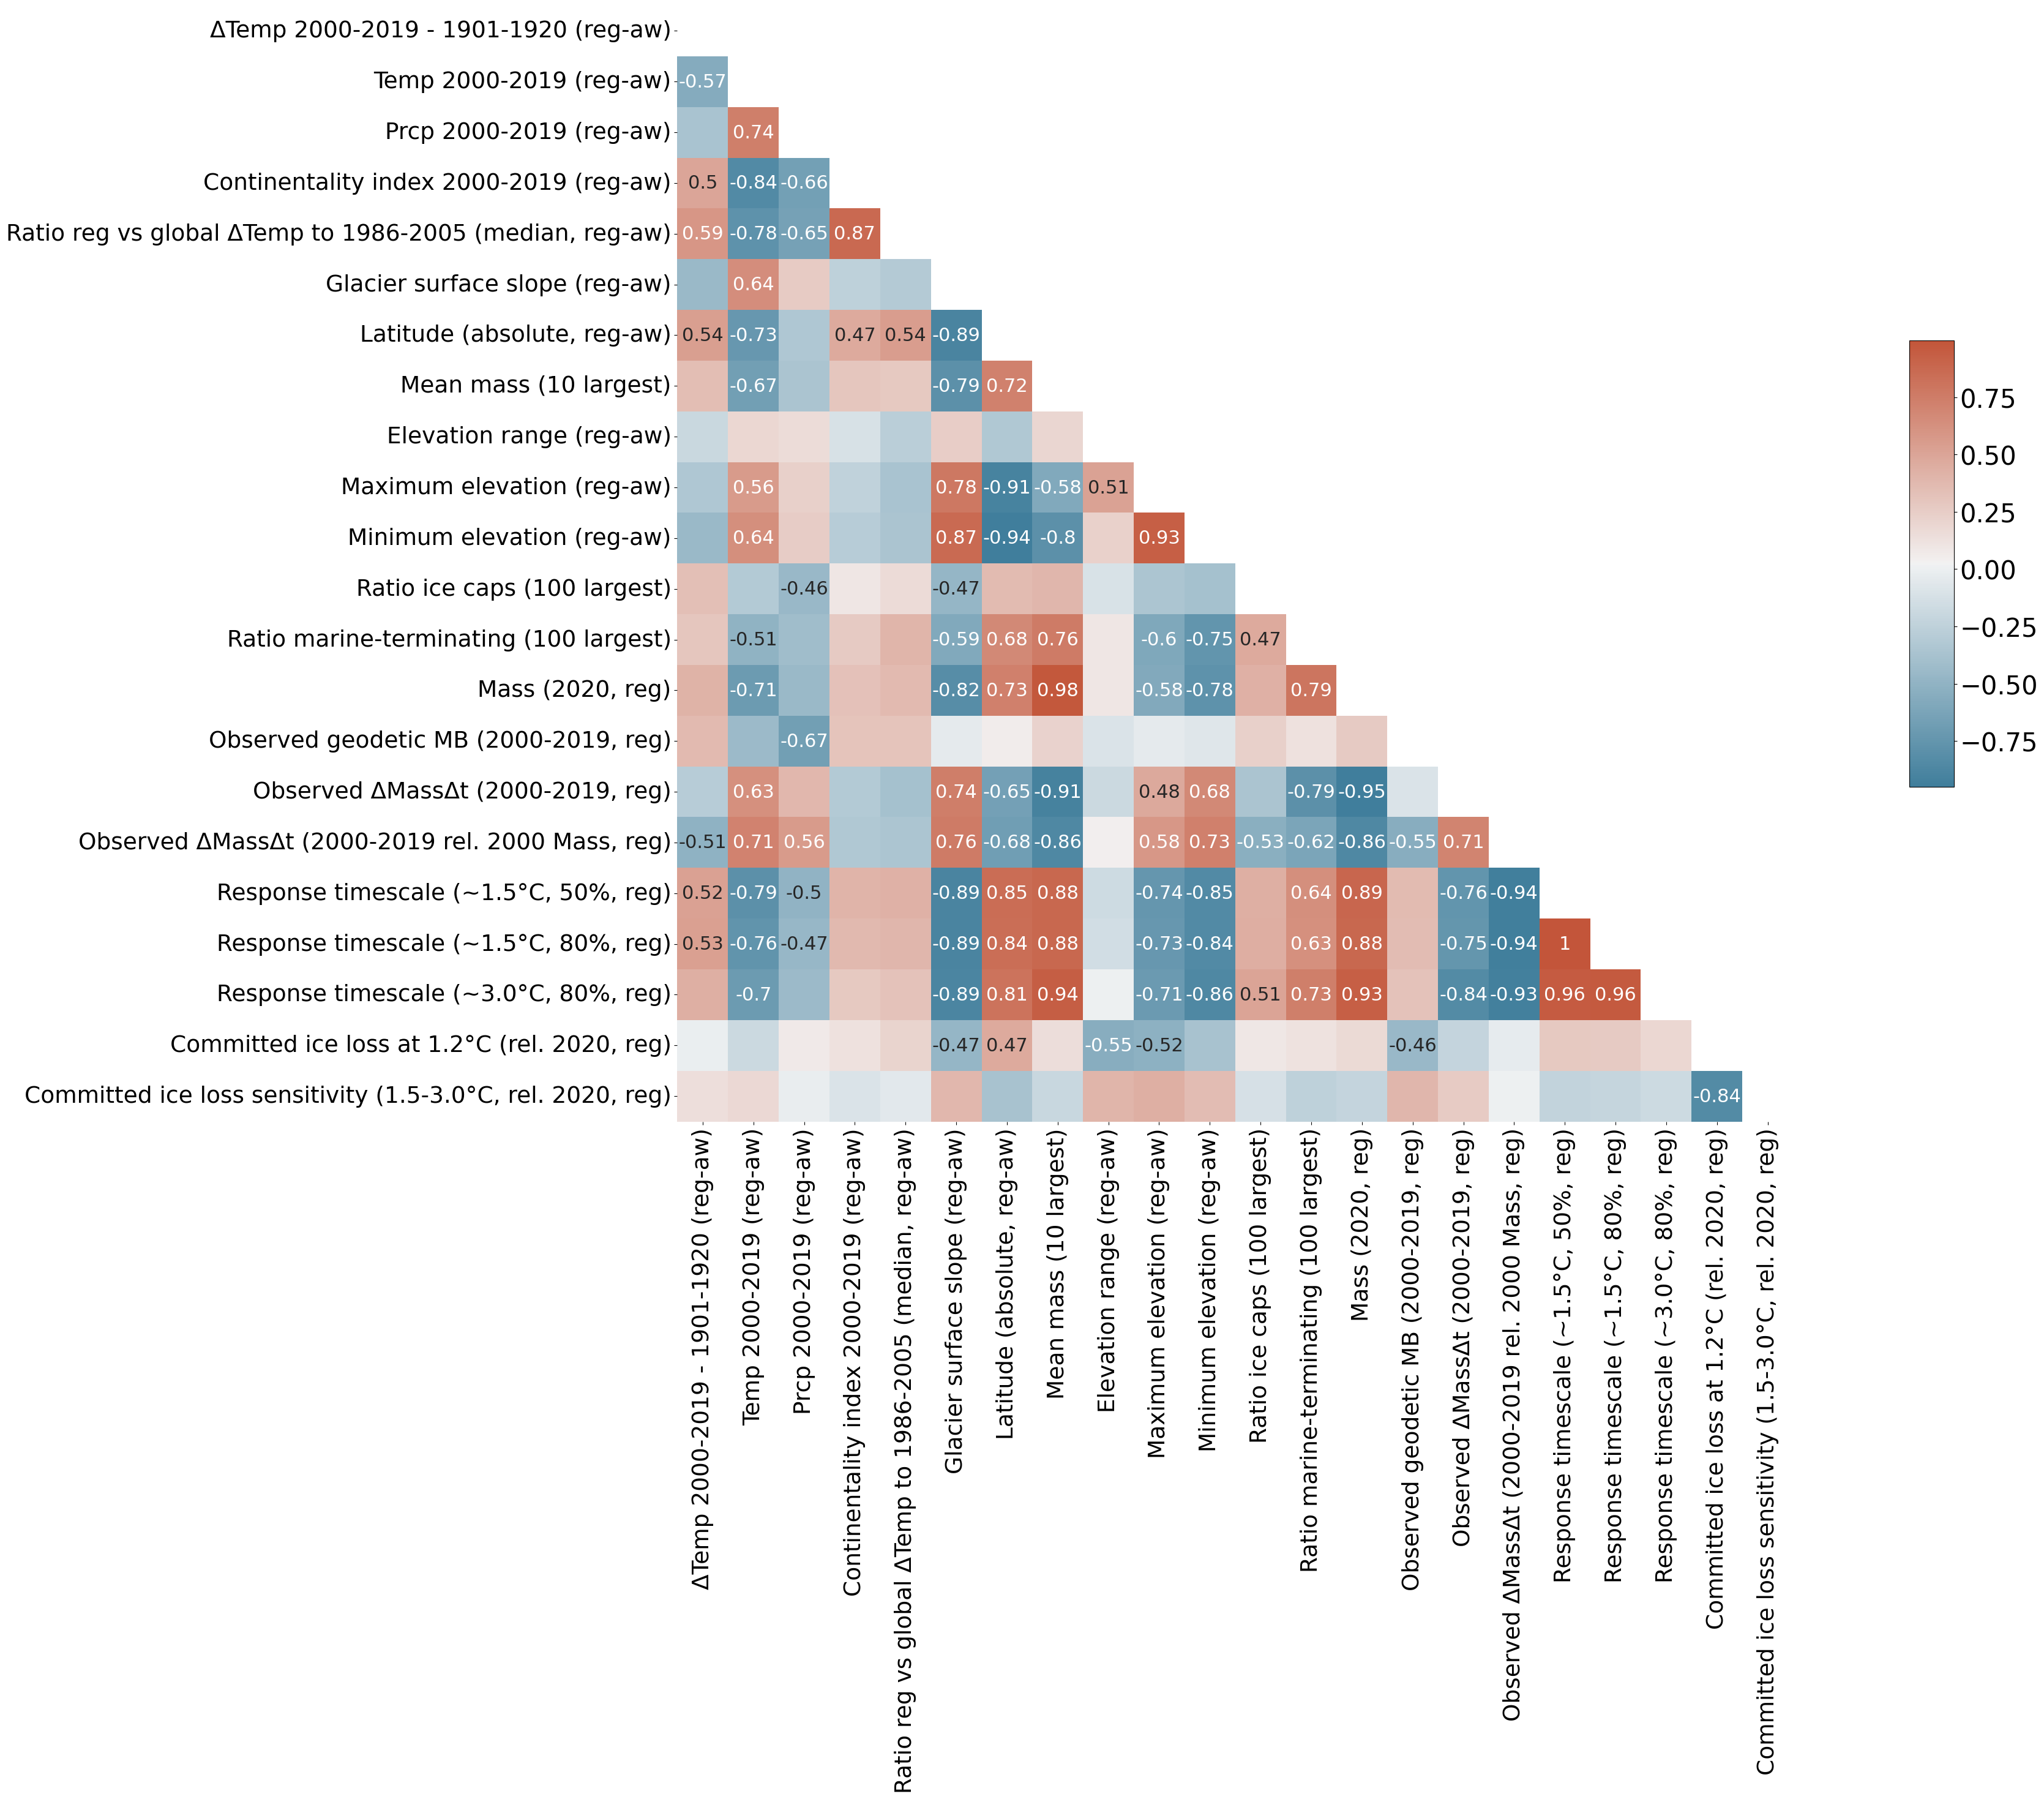

In [35]:


#################################################################
#Correlation between different variables
#
plt.rc('font', size=27)  

df_sel = df.loc[df.rgi_reg !='All'].reset_index(drop=True)[columns_sel3].copy()

assert list(df_sel.columns) == list(columns_sel3)
# ok, let's rename it to nice names
df_sel.columns = columns_sel3_d.values()

corr = df_sel.corr(method='spearman') # df_sel.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(45, 30))
#
#plt.title('spearman rank\ncorrelation coefficient (r)')
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
# Create an empty matrix to store p-values
num_cols = len(df_sel.columns)
p_values = np.zeros((num_cols, num_cols))

# Calculate p-values for each pair of columns
for i, col1 in enumerate(df_sel.columns):
    for j, col2 in enumerate(df_sel.columns):
        a, p_value = spearmanr(df_sel[col1], df_sel[col2])
        #print(a,p_value, i,j)
        p_values[i][j] = p_value

# Convert the matrix to a DataFrame for better visualization
p_values_df = pd.DataFrame(p_values, columns=df_sel.columns, index=df_sel.columns)

heatmap=sns.heatmap(corr, annot=False, mask = mask, cmap=cmap, cbar=False)

# let's not include those because they are only confusing...
#sns.heatmap(corr[(p_values_df<0.1)&(p_values_df>=0.05)],annot=True, mask = mask, cmap=cmap,
#            annot_kws={'fontsize':12}, alpha =0, cbar=False)


# Assume colorbar was plotted last one plotted last
sns.heatmap(corr[p_values_df<0.05],annot=True, mask = mask, cmap=cmap, annot_kws={'fontsize':22}, alpha =0, cbar=False)
ax.set_aspect('equal')

# Manually create a single colorbar
cbar = f.colorbar(heatmap.collections[0], ax=ax, shrink=0.4, aspect=10)
cbar.ax.tick_params(labelsize=30)  # Set larger labels for the colorbar

# Get the images on an axis
#ax = plt.gca()
#im =  # Display the image data
#cbar = fig.colorbar(ax.imshow(data)    )  # Add a colorbar to the figure based on the image
#cbar.set_ticklabels(cbar.get_ticks(), fontsize=32)
#cb = im[-1].colorbar   
#ax.set_yticklabels(fontsize=24)
#ax.set_xticklabels(fontsize=24)

plt.tight_layout()
plt.savefig('figures/extended_data/fig_ED_fig_corr_matrix.pdf')

### Supplementary figure with other response timescale "definitions"

ratio: 2.3548387096774195 slope: 2.7052343696186014
ratio: 1.7452054794520548 slope: 1.5546863180361026


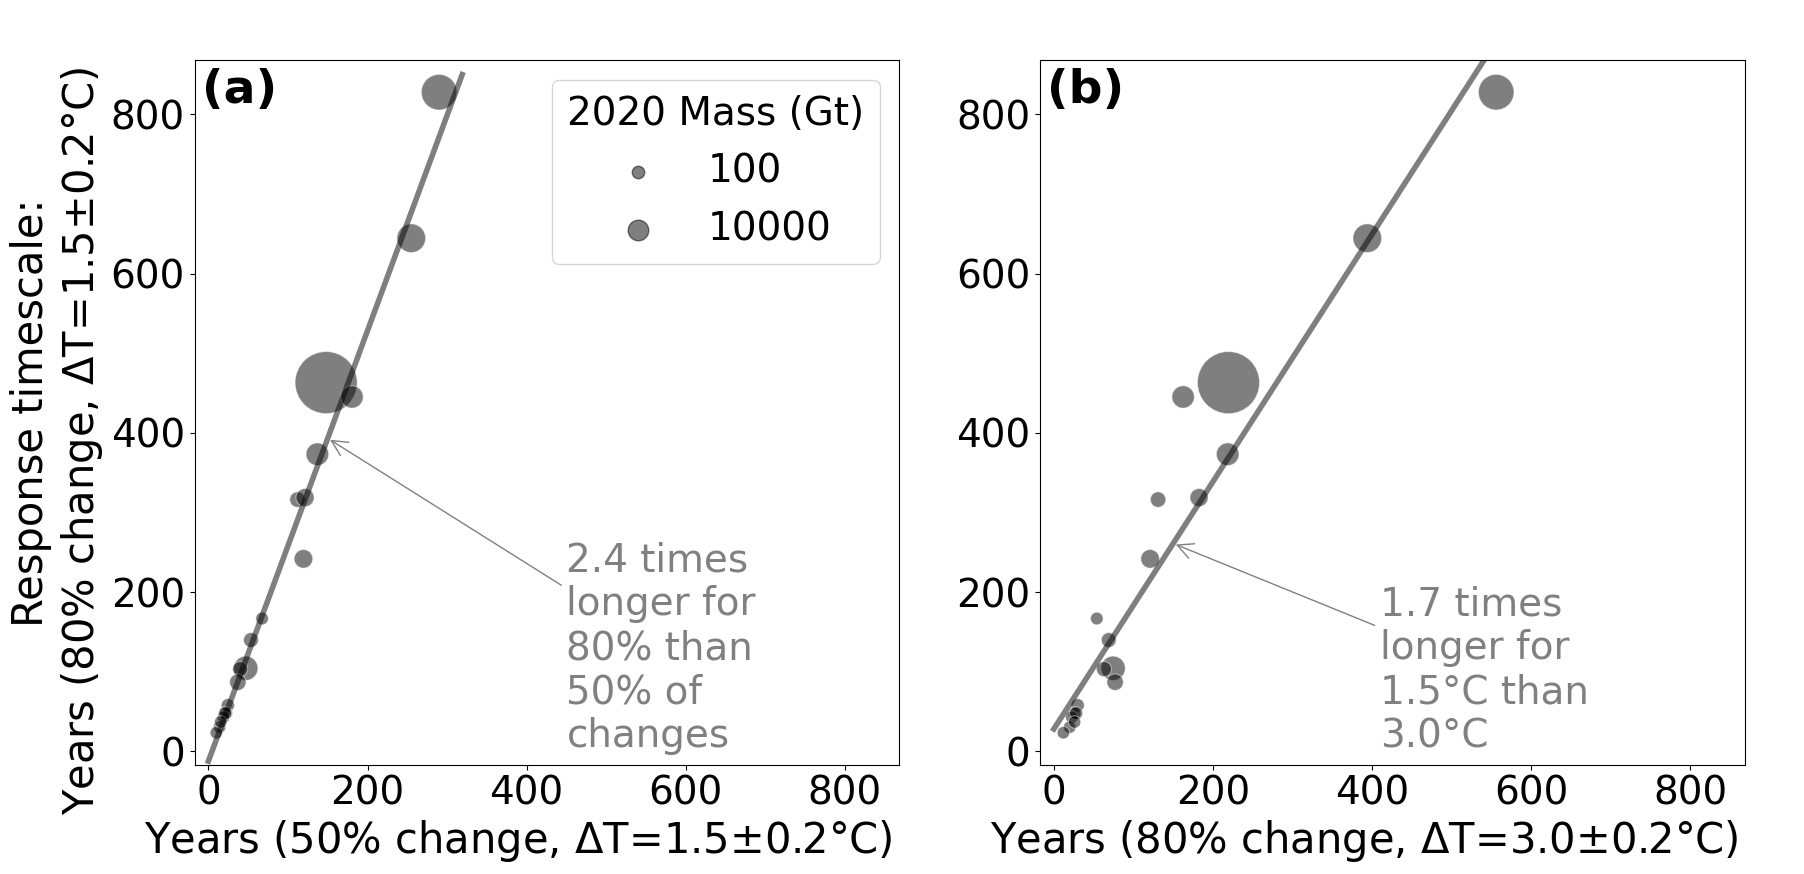

In [35]:
num_text_x = 0.01

_df = df.loc[df.region!='Globally']

plt.rc('font', size=28)  
fs_label=30

sizes = (80,2000)
alpha = 0.9

alpha = 0.5
num_text_y=0.94

plt.figure(figsize=(20,10))

plt.subplot(121)
inset_ax = plt.gca()
yy2 = 'resp_time_-80%_1_5_deg'
xx2 = 'resp_time_-50%_1_5_deg'

scatti = sns.scatterplot(df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                              sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
               )

size_r = sizes[1] - sizes[0]
custom_labels = [100, 10000]
custom_sizes = []
for c in custom_labels:
    custom_sizes.append(sizes[0] + size_r*(c-min_s)/(max_s-min_s))


# Create a new set of handles for the custom sizes
custom_handles = [ax.scatter([], [], s=size, color='black', alpha = alpha) for size in custom_sizes]


# Update the legend with the custom sizes
scatti.legend(custom_handles, custom_labels,
               title='2020 Mass (Gt)', loc='upper right')


inset_ax.set_xlabel(r'Years (50% change, $\Delta$T=1.5$\pm$0.2°C)'+ '     ', fontsize=fs_label) #'Year (50%)')
inset_ax.set_ylabel(f'Response timescale:\n' + r'Years (80% change, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=fs_label)#, fontsize=20) 

#inset_ax.set_ylabel(r'Years (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=fs_label) #'Year (80%)') 
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
inset_ax.text(num_text_x, num_text_y,
         num_dict[0], weight='bold', fontsize=34, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,200))
inset_ax.set_yticks(np.arange(0,lim1,200))

#inset_ax.text(0.98,0.02,
#              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n80% vs\n50% of\nchanges", 
#              fontsize=24,
#     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
#inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)

#############
slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                              _df[yy2])
ylim = inset_ax.get_ylim()
x_range = np.arange(0,df[xx2].values.max()*1.1, 0.01)
inset_ax.plot(x_range,slope*x_range + intercept, 
              color = 'black', alpha = 0.5, lw=4)
ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
print('ratio:', ratio, 'slope:' , slope)
inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                  xy=(150,slope*150 + intercept),
                  xytext=(450,5),
                  fontsize = 28,
                  arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                  color='grey') #, alpha1)
inset_ax.set_ylim(ylim)

plt.subplot(122)

yy2='resp_time_-80%_1_5_deg'
xx2 = f'resp_time_-80%_3_0_deg'
inset_ax = plt.gca()
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
               sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
               )

inset_ax.set_xlabel(r'Years (80% change, $\Delta$T=3.0$\pm$0.2°C)'+ '     ', fontsize=fs_label)#, fontsize=20)
inset_ax.set_ylabel('')
inset_ax.text(num_text_x, num_text_y,
         num_dict[1], weight='bold',fontsize=34, transform=inset_ax.transAxes)
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
#inset_ax.text(num_text_x, num_text_y*0.9,
#         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96',
#         fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,200))
inset_ax.set_yticks(np.arange(0,lim1,200))
#inset_ax.text(0.98,0.02, 
#              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=24,
# transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
#inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                              _df[yy2])
ylim = inset_ax.get_ylim()
x_range = np.arange(0,df[xx2].values.max()*1.1, 0.01)
inset_ax.plot(x_range,slope*x_range + intercept, 
              color = 'black', alpha = 0.5, lw=4)
ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
print('ratio:', ratio, 'slope:' , slope)
inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n1.5°C than\n3.0°C", 
                  #times\nlonger for\n80% vs\n50% of\nchanges",
                  xy=(150,slope*150 + intercept),
                  xytext=(410,5),
                  fontsize = 28,
                  arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                  color='grey') #, alpha1)
inset_ax.set_ylim(ylim)
plt.savefig('figures/supplements/suppl_figS4_response_time_scale_variants.png')
plt.savefig('figures/supplements/suppl_figS4_response_time_scale_variants.pdf')

### Other Fig. 3 variants without colors and without changing size 

pval 0.01450849826103622
pval 7.945754181709547e-06
pval 2.4425413626605395e-07
pval 2.353290129320101e-09
pval 0.01450849826103622
pval 7.945754181709547e-06
pval 2.4425413626605395e-07
pval 2.353290129320101e-09


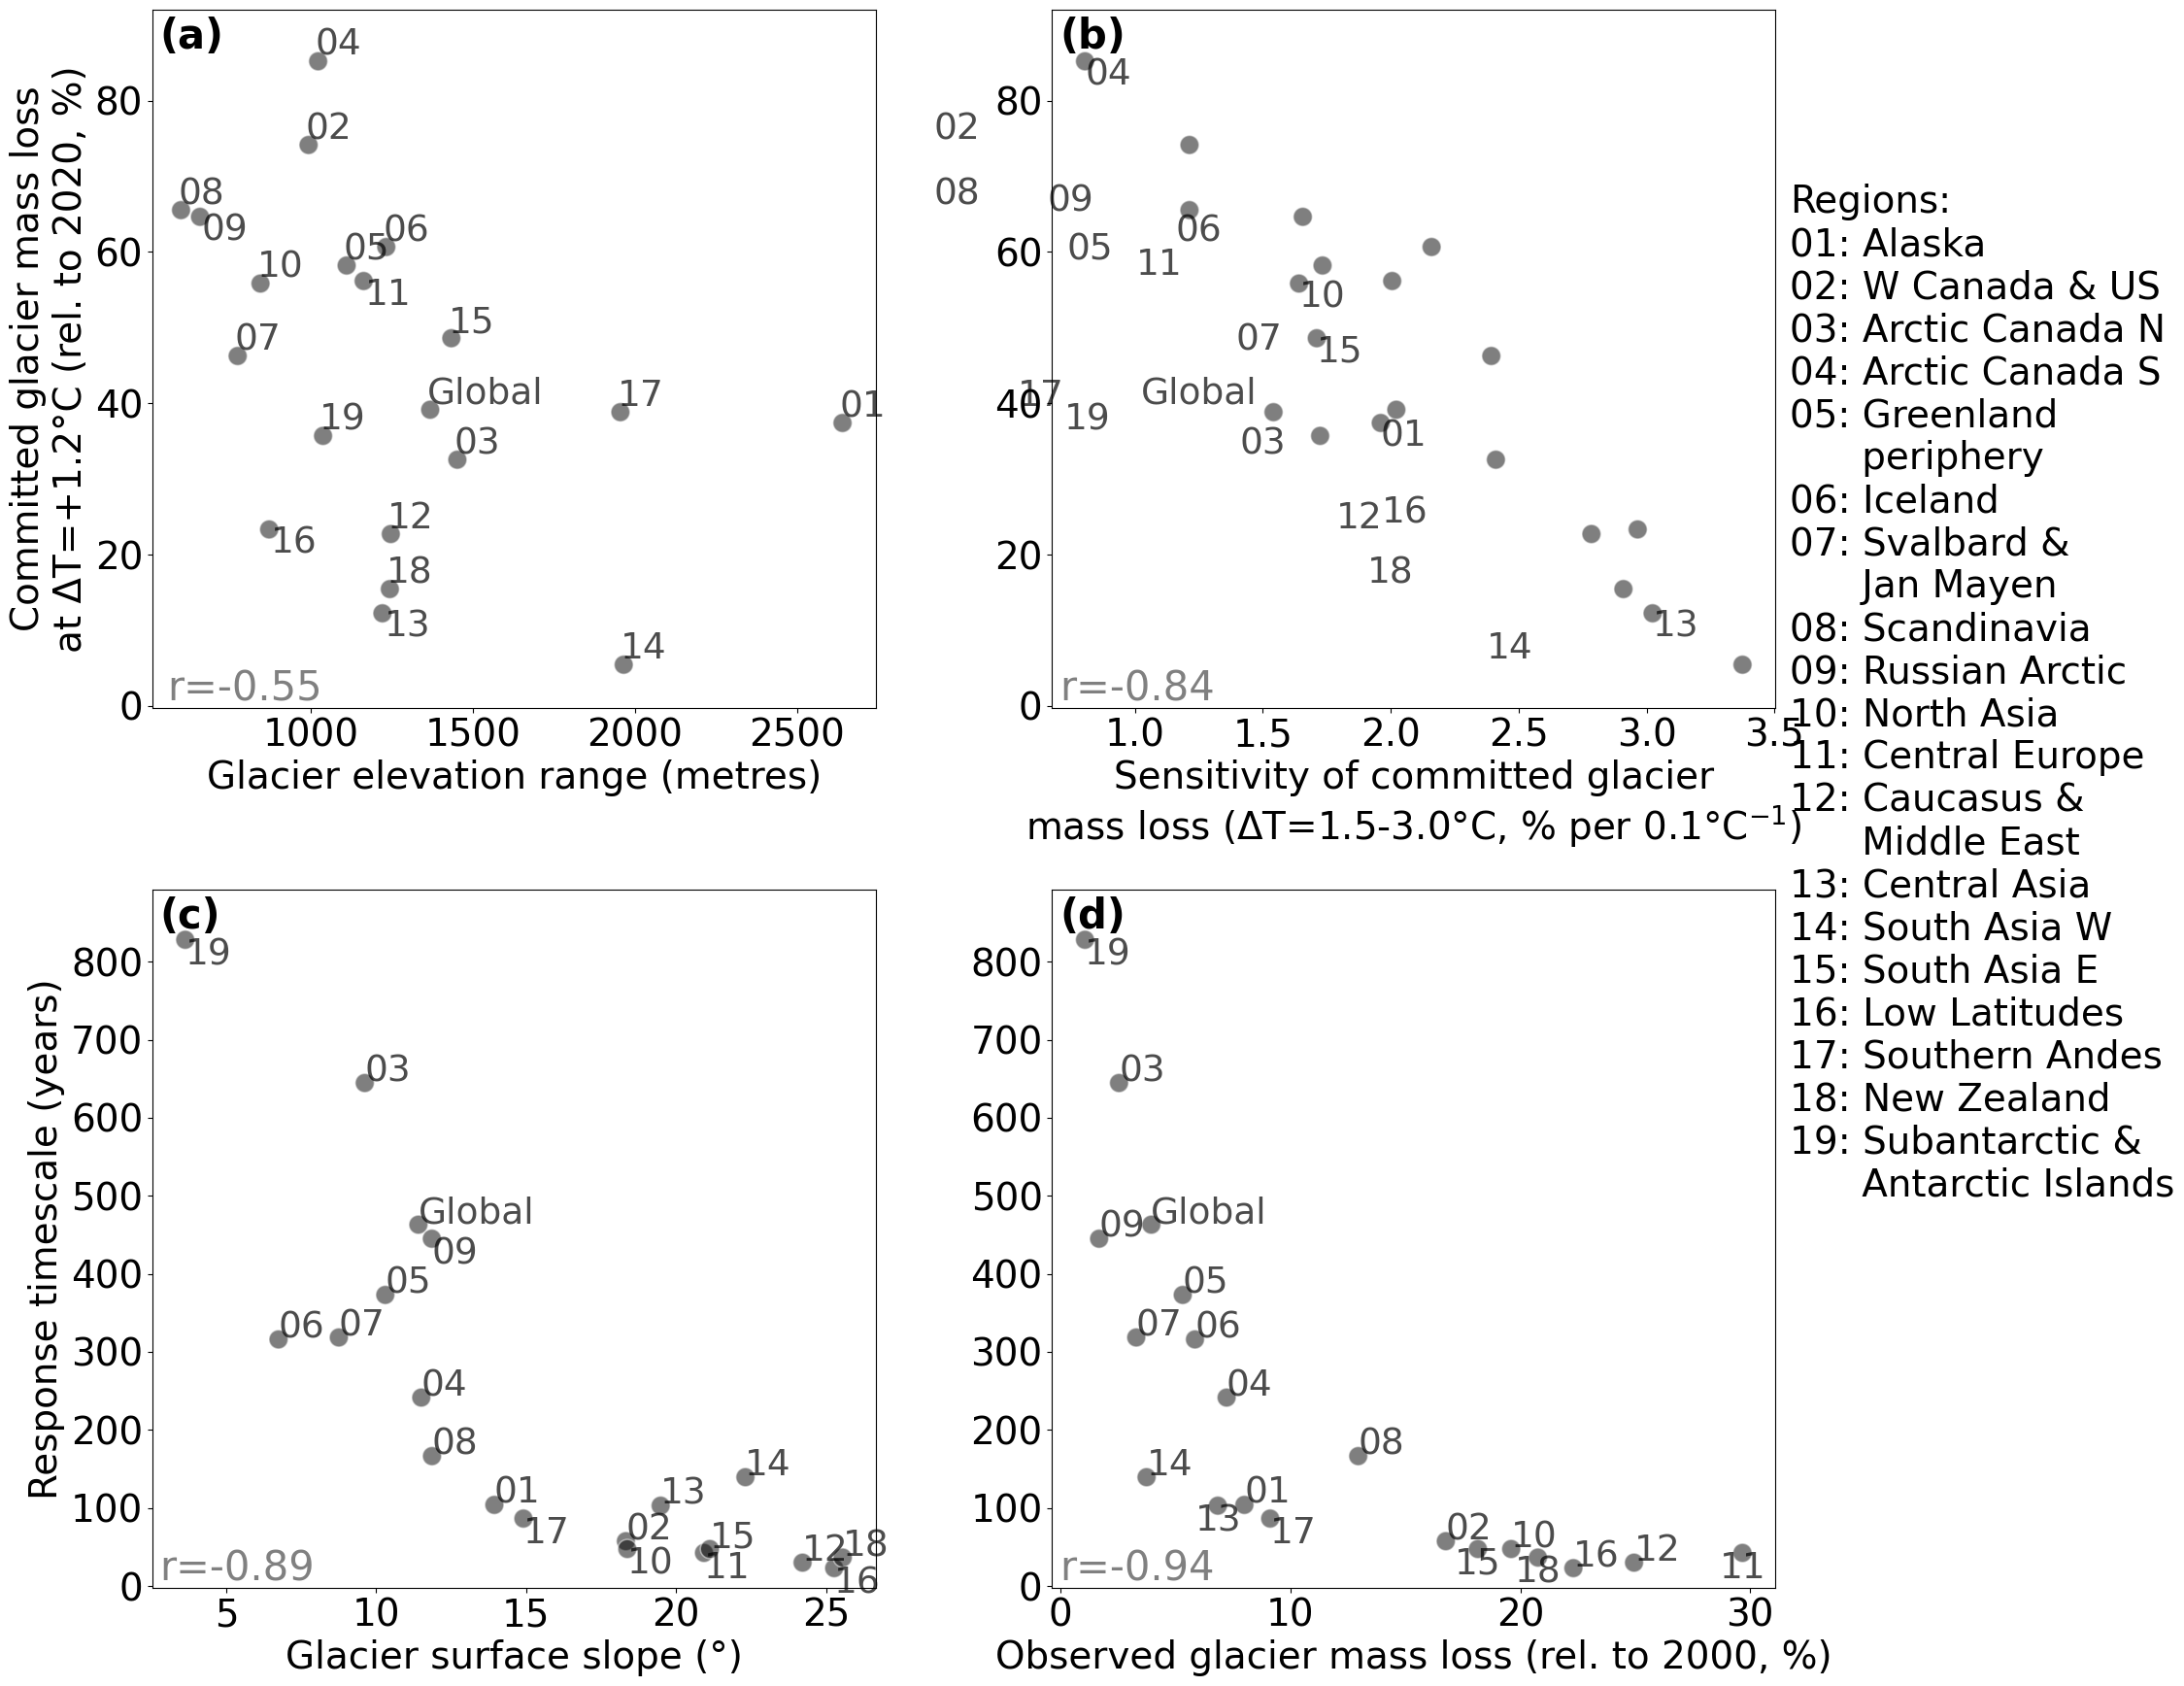

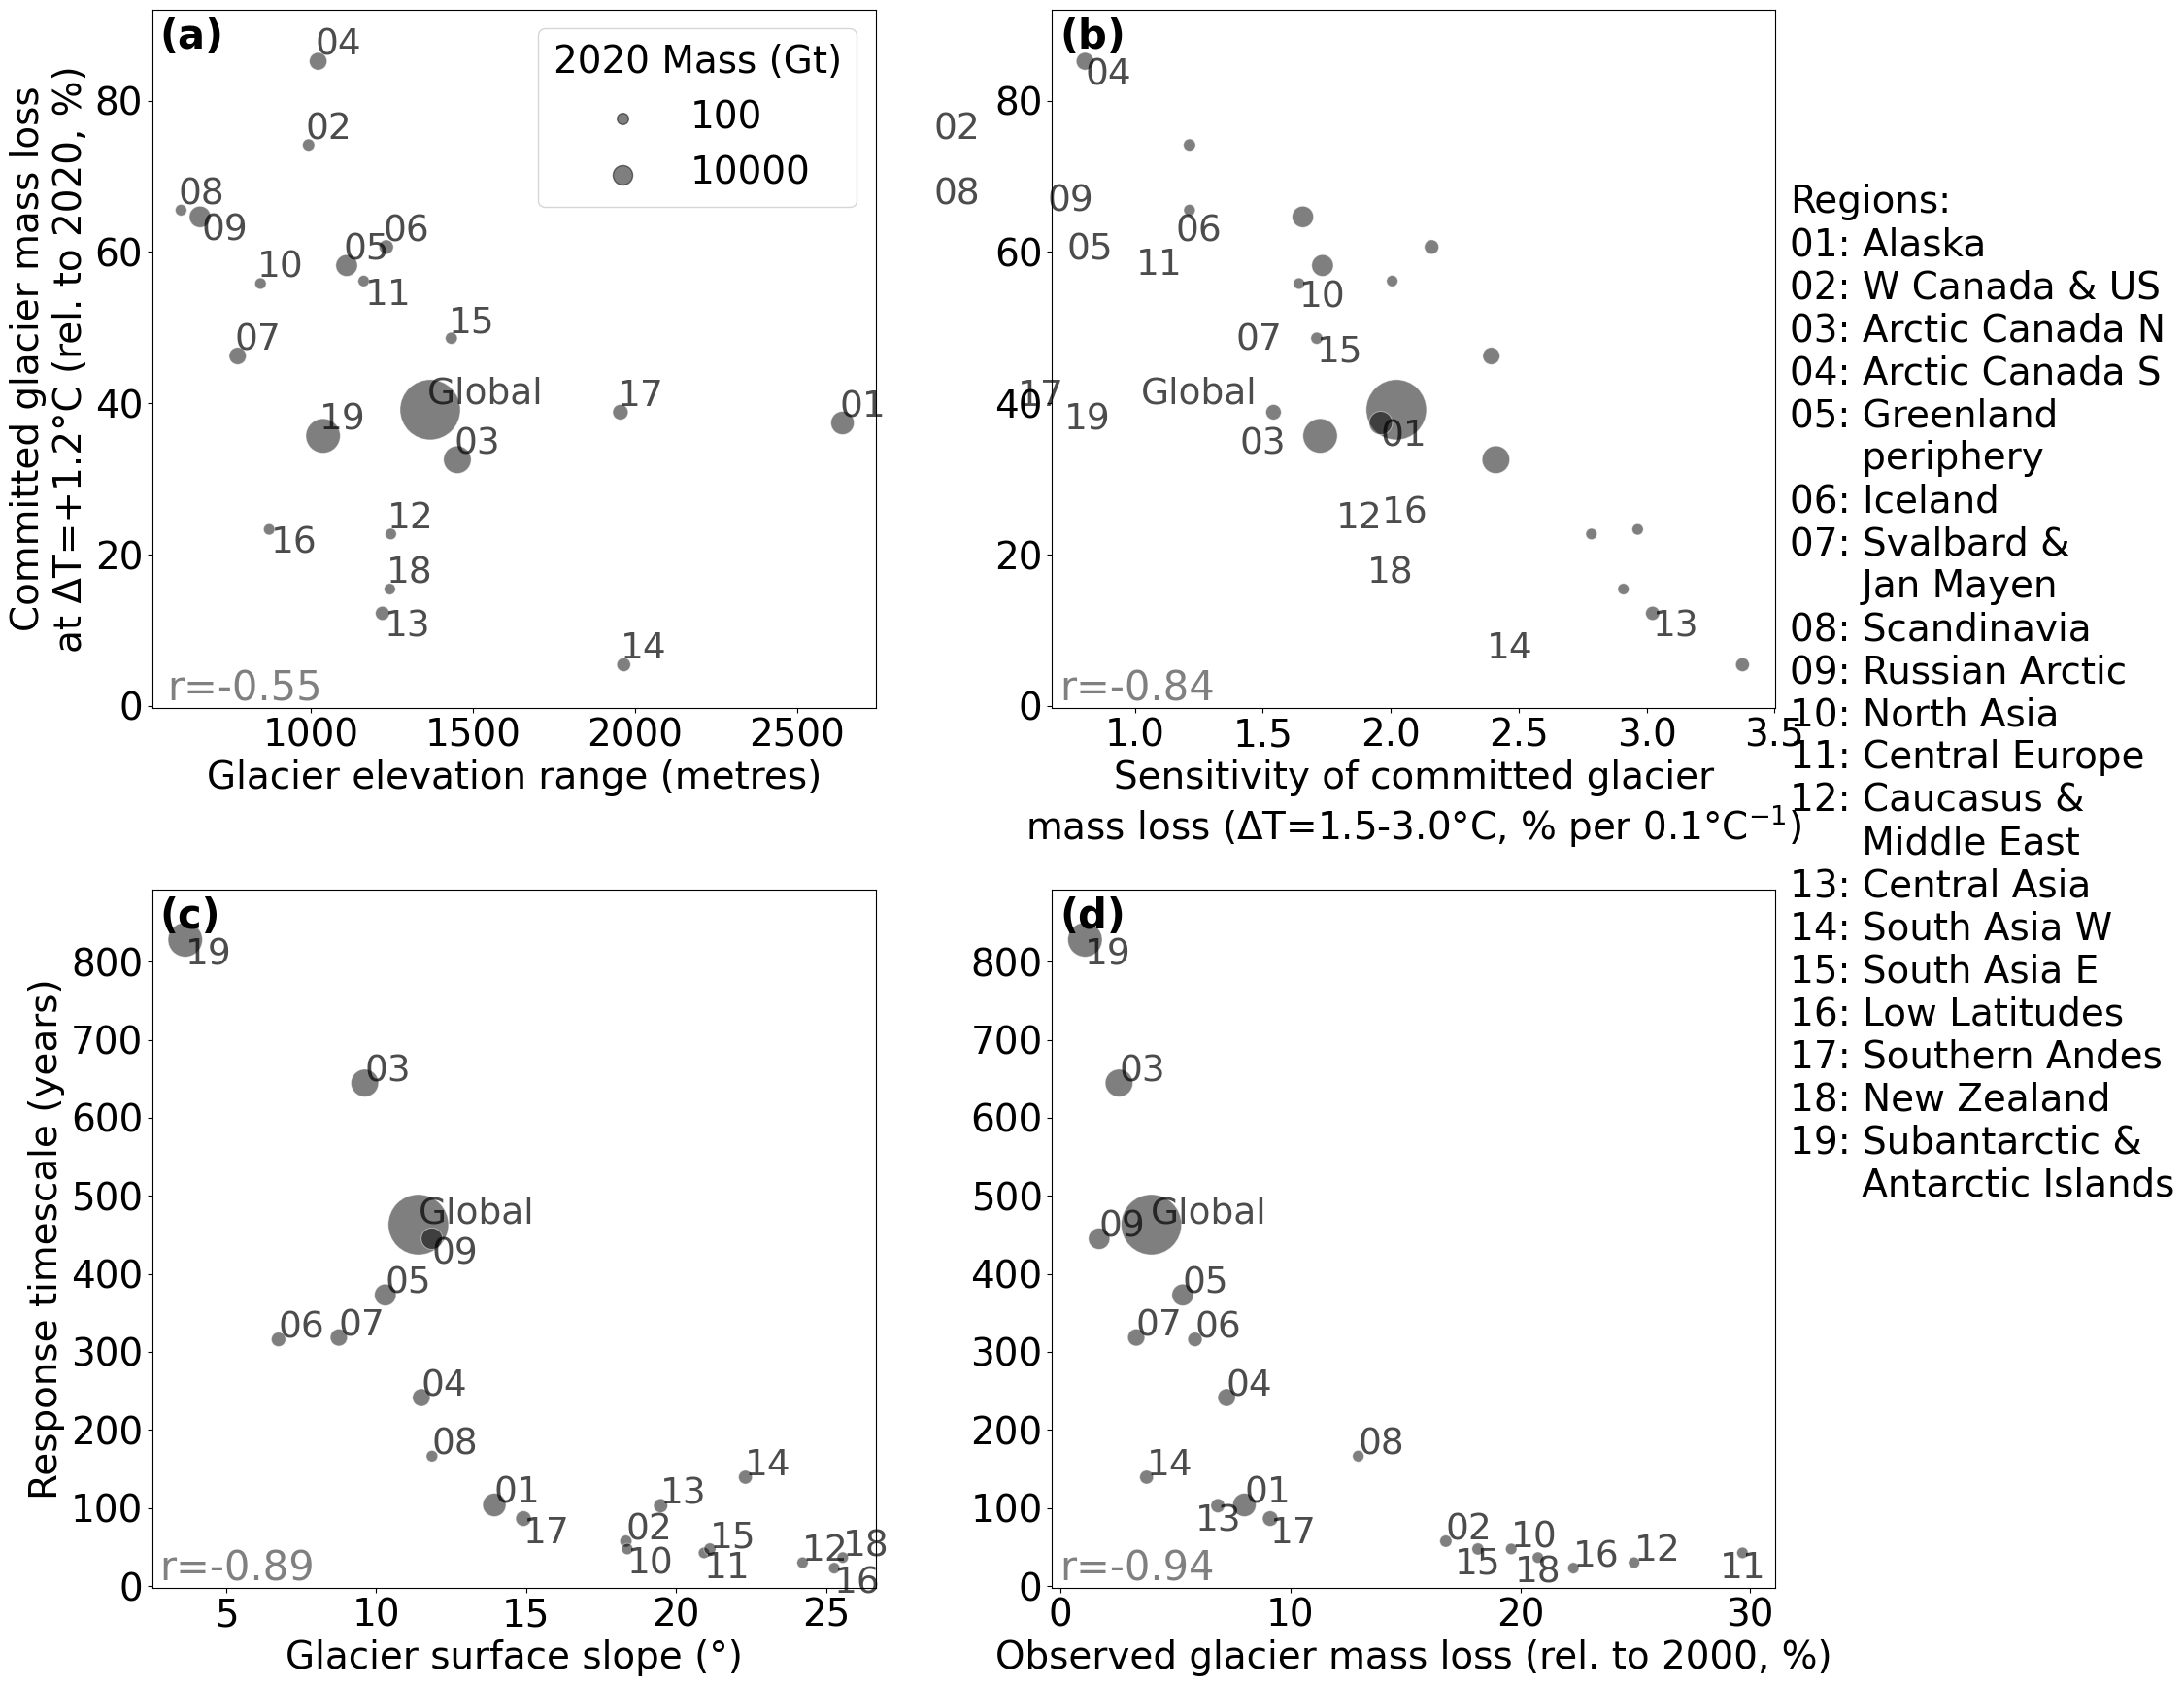

In [30]:
for changing_size in [False,True]: 
    if changing_size:
        sizes = (70,2000) #2000
        alpha = 0.5
        add ='_changing_size'
    else:
        sizes = (200,200)
        alpha = 0.5#7
        add = ''

    assert (rel_add == '_rel_2020') & (k==3)

    plt.rc('font', size=28)  
    fs_t = 30
    fig,axs = plt.subplots(2,2,figsize=(23,18)) #24
    num_text_x = 0.01
    num_text_y = 0.95
    axs = axs.flatten()
    ###    a)
    ax=axs[0]

    drop_l = ['11','16', '13', '09']
    xx = 'elev_diff_area_weighted'
    #ax.set_xlabel(f'Glacier elevation range\n(glacier-area weighted, metres)') 
    ax.set_xlabel(f'Glacier elevation range (metres)') 

    # \n(in metres, glacier-area weighted)

    yy = f'ice_loss_1.2°C_%{rel_add}'

    if changing_size:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                y=yy, 
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax) #'full'
        # Get the marker size from the scatterplot
        #size_order = np.sort(scatti.collections[0].get_sizes())
        #handles, labels = ax.get_legend_handles_labels()
        #print(handles)
        #for j,h in enumerate(handles):
        #    marker_size = size_order[j]
        #    h.set_alpha(alpha)
        #    h.set_sizes([marker_size])
        #    if j in [0,10,18]:
        #        print(marker_size)
        #ax.legend([handles[0],handles[9],handles[-1]], [np.round(float(labels[0]),0).astype(int),
         #                                               np.round(float(labels[9]),0).astype(int),
         #                                          np.round(float(labels[-1]),0).astype(int)],
         #           title='2020 Mass (Gt)',
         #           #bbox_to_anchor = (1, 0.35), 
         #           ncol=1, loc='upper right')        
        
        
        size_r = sizes[1] - sizes[0]
        custom_labels = [100, 10000]
        custom_sizes = []
        for c in custom_labels:
            custom_sizes.append(sizes[0] + size_r*(c-min_s)/(max_s-min_s))


        # Create a new set of handles for the custom sizes
        custom_handles = [ax.scatter([], [], s=size, color='black', alpha = alpha) for size in custom_sizes]
        # Update the legend with the custom sizes
        scatti.legend(custom_handles, custom_labels,
                       title='2020 Mass (Gt)', loc='upper right')
    else:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                y=yy, 
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax)

    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values, 
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.02,0.01, f'r={corrcoef}', ha='left', # spearman's rho (but wrote r because rho could be misundestood as density...)
                transform=ax.transAxes, color='grey', fontsize=fs_t)

    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    _pd_lowess_ch.drop(drop_l).apply(lambda x: plotlabel_0(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l].apply(lambda x: plotlabel_b0(x[xx],x[yy], x.region, ax=ax), axis=1)
    if rel_add == '_rel_farinotti':
        ax.set_ylabel('Gacier mass loss until steady-state\n(% rel. to Farinotti, ΔT=+1.2°C)') 
    else:
        #ax.set_ylabel('Glacier mass loss until steady-state\n(% rel. to 2020, ΔT=+1.2°C)')  # Steady-state glacier mass loss
        ax.set_ylabel('Committed glacier mass loss\nat ΔT=+1.2°C (rel. to 2020, %)')  # Steady-state glacier mass loss
    
    ##### b)
    ax1 = ax
    ax.set_xlim([510, ax.get_xlim()[-1]])
    ### 
    ax = axs[1]

    temp0 = 1.5
    temp1 = 3.0
    xx=f'ice_loss_slope_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_tenth_degC{rel_add}'
    yy=f'ice_loss_1.2°C_%{rel_add}'
    sns.scatterplot(data=_pd_lowess_ch, x= xx,
                    color='black', alpha =alpha,  
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                        y=yy, ax = ax,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                             #palette=palette_cb[:k],
                    legend = False) #False)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    #print(corrcoef)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', # spearman
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #drop_l_2 = ['01','04','02','07','16','08']
    drop_l_2 = ['01','13','04','10','15']

    _pd_lowess_ch.drop(drop_l_2).apply(lambda x: plotlabel_1(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l_2].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    # ax.set_xlabel('Sensitivity of glacier mass loss until steady-state\n'+r'(ΔT=1.5-3.0°C, % °C$^{-1}$)')
    ax.set_xlabel('Sensitivity of committed glacier\nmass loss '+r'(ΔT=1.5-3.0°C, % per 0.1°C$^{-1}$)')

    #(difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')
    ax.set_ylabel('')
    #Steady-state glacier mass loss\n(% rel. to 2020, ΔT=1.2°C)') 

    #ax.set_ylabel('Ice loss in steady-state\n(% rel. to initial state, ΔT=+1.2°C)') 
    ################## c)
    ax2=ax
    ##########

    num_text_x = 0.01
    num_text_y = 0.93
    r=1
    c=2
    ax=axs[2]
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response timescale (years)'

    xx2 = f'resp_time_-50%_1_5_deg'
    #xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'
    xlabel2 = f'Year (50%, $\Delta$T=1.5$\pm$0.2°C)'

    xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=_pd_lowess_ch,
                    y= yy, 
                    x=xx,
                    color='black',alpha =alpha,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    #palette=palette_cb[:k],
                    #s=200, 
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                    legend = False, ax = ax)
    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    drop_l_3 = ['11','10','19','16','17', '09']

    _pd_lowess_ch.drop(drop_l_3).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)

    _pd_lowess_ch.loc[['11','10','19','16','17','09']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)


    ax.set_ylabel(ylabel)

    #ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')
    ax.set_xlabel(f'Glacier surface slope (°)') #\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')

    if subpanels:
        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                                      sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )
        inset_ax.set_xlabel(xlabel2+ '     ', fontsize=22) #'Year (50%)')
        inset_ax.set_ylabel(ylabel + '     ', fontsize=22) #'Year (80%)') 
        #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[3], weight='bold', fontsize=32, transform=inset_ax.transAxes)

        #plt.text(0.99, 0.99,
        #         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
        #         transform=inset_ax.transAxes)
        #plt.ylim([-2,840])
        #inset_ax.grid(alpha=0.5)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))

        #inset_ax.text(0.98,0.02,
        #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n80% vs\n50% of\nchanges", 
        #              fontsize=24,
        #     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
        #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)

        #############
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        #print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(450,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)
    ax3=ax

    ##############################################
    ax = axs[3]
    
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response timescale (years)'

    #s when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    xx2 = f'resp_time_-80%_3_0_deg'

    xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=  _pd_lowess_ch,
                    y= yy, 
                    x=xx,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    color='black',alpha =alpha,
                    s=200,
                    #palette=palette_cb[:k], s=200,
                    size = 'gt_2020_via_5yravg',
                    sizes=sizes,
                    legend = False, ax=ax)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
    #pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.drop(['19','17','18','15','13','11']).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['19','17']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['18','15','13','11']].apply(lambda x: plotlabel_bbl(x[xx],x[yy], x.region, ax=ax), axis=1)

    ax.set_ylabel(ylabel)

    #ax.set_xlabel(f'Observed glacier mass loss\n(2000-2019 rel. to 2000, %)') # end of 2019
    ax.set_xlabel(f'Observed glacier mass loss (rel. to 2000, %)') # end of 2019 ### 2000-2019 
    
    if subpanels:

        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                       sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )

        inset_ax.set_xlabel(r'Year (80%, $\Delta$T=3.0$\pm$0.2°C)'+ '     ', fontsize=22)#, fontsize=20)
        inset_ax.set_ylabel(r'Year (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=22)#, fontsize=20) 
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[5], weight='bold',fontsize=32, transform=inset_ax.transAxes)
        #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
        #inset_ax.text(num_text_x, num_text_y*0.9,
        #         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

        #plt.text(0.99, 0.99,
        #         'R²=0.96',
        #         fontsize=22, color='grey', va='top', ha='right',
        #         transform=inset_ax.transAxes)
        #plt.ylim([-2,840])
        #inset_ax.grid(alpha=0.5)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))
        #inset_ax.text(0.98,0.02, 
        #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=24,
        # transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
        #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        #print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n1.5°C than\n3.0°C", 
                          #times\nlonger for\n80% vs\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(410,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)


    ax4=ax

    ############
    num_text_x = 0.01
    for j,axi in enumerate([ax1, ax2,ax3,ax4]):
        num_text_y = 0.945
        if j==3 and subpanels:
            jj = j+1
        else:
            jj = j
        axi.text(num_text_x, num_text_y,
                 num_dict[jj], fontsize=30, weight='bold',transform=axi.transAxes)
        if j>=2:
            axi.set_ylim([-2,892])
        else:
            axi.set_ylim([-0.2,92])
        if j in [1,3]:
            axi.set_ylabel('')
            #axi.set_yticklabels([]) 
        #if j<3:
        #    axi.set_ylim(ax1.get_ylim())
    #plt.savefig(f'figures/fig4_{DATE}.png')
    #plt.savefig(f'figures/fig4_{DATE}.pdf')
    plt.tight_layout(rect=(0,0,0.84,1))


    ax.text(1.02, 0.5, 'Regions:\n'+ legend_text, transform=ax.transAxes, #weight='bold',
            fontsize=28)

    #plt.savefig(f'figures/fig4{add}_subpanel{subpanels}_wglobal.png')
    #plt.savefig(f'figures/fig4{add}_subpanel{subpanels}_wglobal.pdf')